<a href="https://colab.research.google.com/github/AbimaelLopez/Diplomado/blob/main/14_Introuccion_redes_neuronales_ejercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **14. Introducción a las redes neuronales**

### Objetivos
Que la o el estudiante aprenda a utilizar redes neuronales usando Kearas en Tensorflow.

### Descripción del procedimiento a seguir
- Se crea una arquitectura sencilla para trabajar con los puntos de datos ex2x y ex2y.
- Se crea una arquitectura sencilla para una predicción binaria con el conjunto de datos Titanic.
- Se crea una arquitectura sencilla para una predicción multiclase con el conjunto de datos Iris.


### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización<br>
Centro de Investigación en Matemáticas Aplicadas <br>
Universidad Autónoma de Coahuila


### Bibliografía
1. https://www.tensorflow.org/guide/keras?hl=es-419


## **1. Importamos bibliotecas**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

from sklearn.metrics import mean_squared_error

from tensorflow.keras.optimizers import Adam

## **2. Leemos los datos y los separamos**

In [2]:
X = pd.read_csv('/content/ex2y.dat', header=None, names = ['x'])
X.head()

,x
0,0.779189
1,0.915968
2,0.905384
3,0.905661
4,0.938989


In [3]:
y = pd.read_csv('/content/ex2y.dat', header=None, names = ['y'])
y.head()

,y
0,0.779189
1,0.915968
2,0.905384
3,0.905661
4,0.938989


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.1, random_state=2)

## **3. Implementamos la regresión líneal desde 0**

In [5]:
#Creamos una función para graficar los puntos y una linea sobre esos puntos
#NOTA: esa linea no necesariamente es la obtenida con regresión, puede ser cualquiera
def plot_points_and_line(x,y,a):
    #Función que grafica puntos y una linea
    #inputs:
    #x - coordenadas x
    #y - coordenadas y
    #a es un vector que tiene los coeficientes a0 y a1 de una línea recta sobre un plano

    #Obtiene la linea a partir de los coeficientes
    linea = a[0]+a[1]*x

    #Grafica los puntos
    plt.scatter(x,y)

    #Grafica la linea
    plt.plot(x,linea,'-r')

    #Muestra la gráfica
    plt.show()




In [6]:
def linear_activation_function(z):
  return z

def sigmoid_activation_function(z):
  return np.divide(1,1+np.exp(-z))

def linearRegression(x,y,epochs,learning_rate):
    #Declaramos un vector de pesos aleatorio de inicio
    weights=np.random.uniform(-1,1,(x.shape[1],1))
    n = len(x)
    for epoch in range(epochs):
        z =  x.dot(weights)
        y_pred = linear_activation_function(z) #Predicción para cada muestra
        costo = np.sum((y-y_pred)**2) * (1/2*n)
        dCosto = y_pred-y
        weights = weights - (1/n)*learning_rate* x.T.dot(dCosto)
    return weights

def predicWithLinearRegression(x_test,w):
  x_test = np.column_stack((np.ones(len(x_test)),x_test))
  y_pred =  x_test.dot(w)
  return y_pred

In [7]:
X_lr = X_train.to_numpy()
y_lr = y_train.to_numpy()
X_orig = X_lr

In [8]:
X_lr[0]

array([0.77918926])

In [9]:
X_lr = np.column_stack((np.ones(len(X_lr)),X_lr))
print("Forma de x: ", X_lr.shape)


Forma de x:  (45, 2)


In [10]:
print(X_lr[0:10])

[[1.         0.77918926]
 [1.         1.2497065 ]
 [1.         1.1897299 ]
 [1.         1.2069462 ]
 [1.         1.0895919 ]
 [1.         1.0634462 ]
 [1.         1.2601134 ]
 [1.         0.96853716]
 [1.         0.94238499]
 [1.         1.0874452 ]]


In [11]:
w=linearRegression(X_lr,y_lr,10000,0.05)


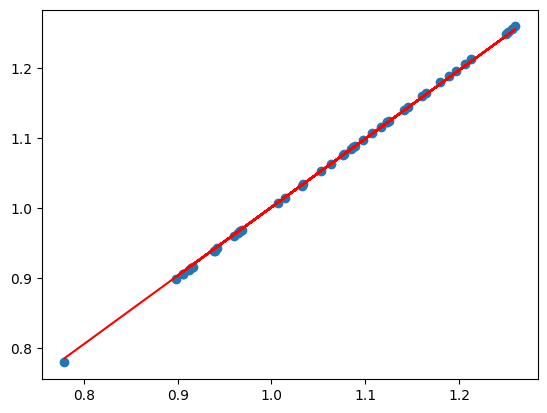

In [12]:
plot_points_and_line(X_orig,y_lr,w)


In [13]:
y_pred=predicWithLinearRegression(X_test,w)

In [14]:
y_pred

array([[1.12409962],
       [1.29819462],
       [1.07027726],
       [0.96297722],
       [0.96836046]])

In [15]:
y_test

,y
36,1.125249
47,1.302993
28,1.070299
9,0.960750
13,0.966246


In [16]:
# Assuming y_test contains the true values
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 6.756825455099997e-06


## **4. Uso de redes neuronales**

**Se define el modelo**

In [17]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_train.shape[1],)),
    #tf.keras.layers.Dense(1, activation='linear'),
])

**Se compila el modelo**

In [18]:
# Specify your desired learning rate
learning_rate = 0.01

# Create an optimizer instance with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

#Compile the model

model.compile(optimizer=optimizer,
              loss='mean_squared_error',  # Common loss function for regression
              metrics=['mean_squared_error', 'mean_absolute_error'])

**Se hace el entrenamiento**

In [19]:
# Train the model
batch_size = X_train.shape[0]
history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

**Se grafica la historia en el entrenamiento**

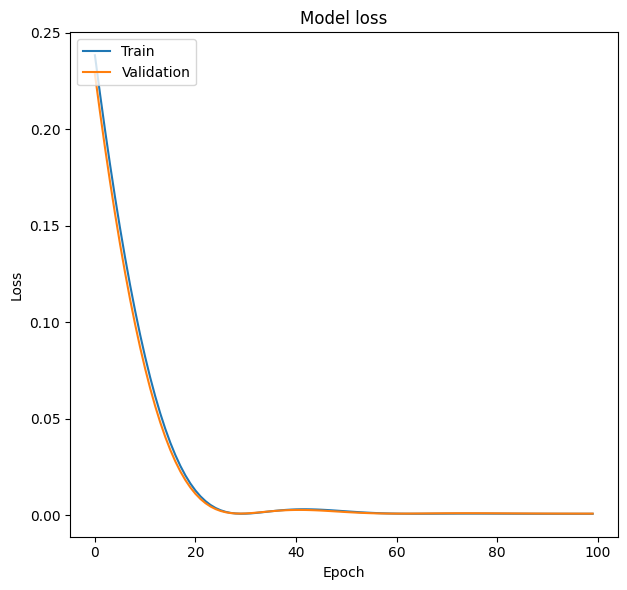

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Se predice el conjunto de prueba**

In [21]:
# Predict on the test set
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 84ms/step


**Se obtiene el MSE**

In [22]:
# Assuming y_test contains the true values
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.0007272117619896331


## **5. Clasificación del conjunto de datos Titanic con redes neuronales**

In [23]:
# Load Titanic dataset (example)
titanic_data = pd.read_csv("/content/titanic (1).csv")

# Preprocess the data (you might need to handle missing values, encode categorical variables, etc.)
# For simplicity, we'll drop NaN values and select a few features
titanic_data = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']].dropna()

# Convert categorical 'Sex' variable to numeric
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Split the dataset into features (X) and target variable (y)
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = titanic_data['Survived']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss function
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")


Epoch 1/50
16/16 [==============================] - 1s 15ms/step - loss: 0.7237 - accuracy: 0.6473 - val_loss: 0.6477 - val_accuracy: 0.6729
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.7004 - accuracy: 0.6533 - val_loss: 0.6328 - val_accuracy: 0.6729
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6786 - accuracy: 0.6653 - val_loss: 0.6206 - val_accuracy: 0.7103
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.6713 - val_loss: 0.6091 - val_accuracy: 0.7103
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6432 - accuracy: 0.6774 - val_loss: 0.5993 - val_accuracy: 0.7290
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6282 - accuracy: 0.6834 - val_loss: 0.5903 - val_accuracy: 0.7103
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.6894 - val_loss: 0.5825 - val_accuracy: 0.7103
Epoch 8/50
16/16 [=

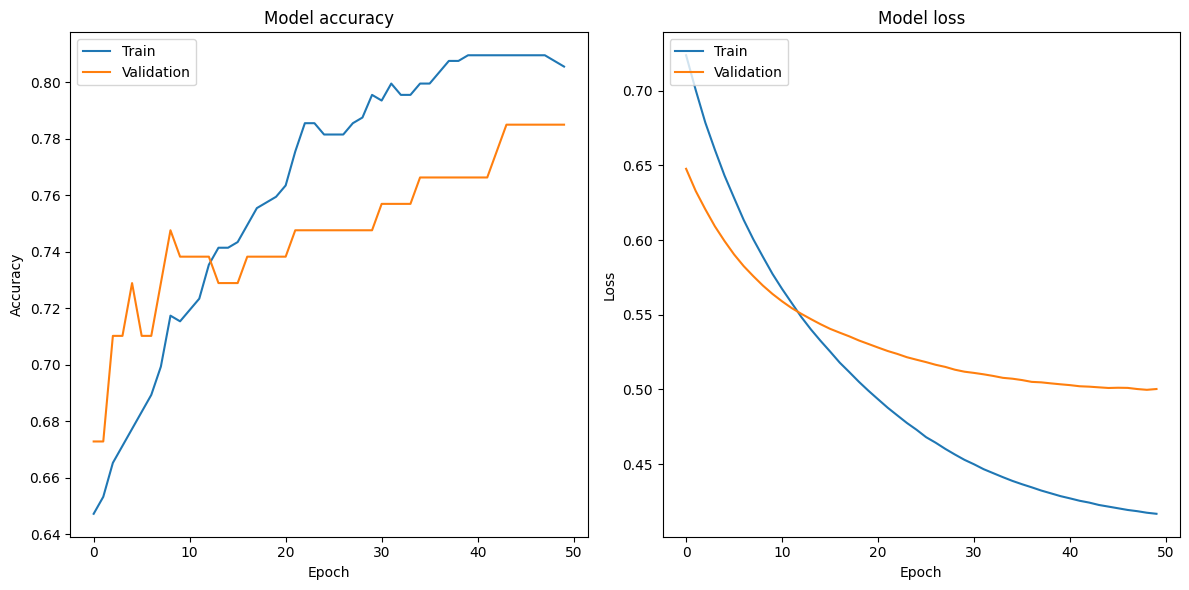

In [24]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## **6. Clasificación del conjunto de datos Iris con redes neuronales**

Epoch 1/100
7/7 [==============================] - 1s 41ms/step - loss: 1.1303 - accuracy: 0.3524 - val_loss: 1.1557 - val_accuracy: 0.2889
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 1.1183 - accuracy: 0.3524 - val_loss: 1.1445 - val_accuracy: 0.2889
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 1.1070 - accuracy: 0.3524 - val_loss: 1.1341 - val_accuracy: 0.2889
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 1.0970 - accuracy: 0.3524 - val_loss: 1.1240 - val_accuracy: 0.2889
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 1.0868 - accuracy: 0.3524 - val_loss: 1.1150 - val_accuracy: 0.2889
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 1.0777 - accuracy: 0.3524 - val_loss: 1.1068 - val_accuracy: 0.2889
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 1.0696 - accuracy: 0.3524 - val_loss: 1.0988 - val_accuracy: 0.2889
Epoch 8/100
7/7 [=======

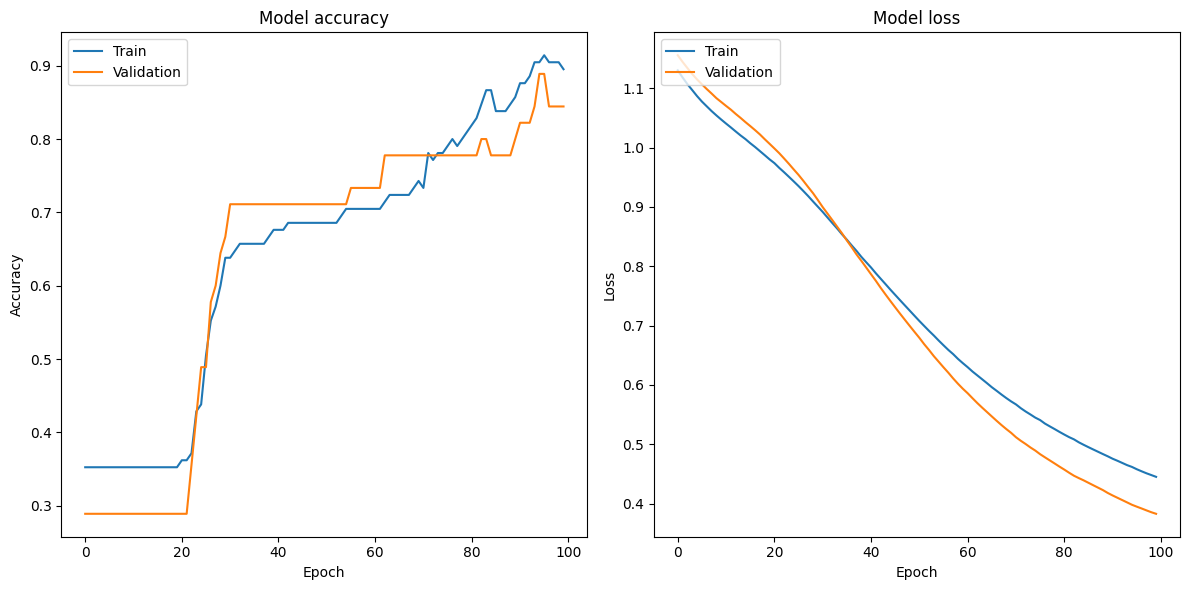

2/2 [==============================] - 0s 5ms/step

Test Accuracy: 84.44%


In [25]:
# Ensure repeatability
np.random.seed(42)
tf.random.set_seed(42)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Convert target variable to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Adjusted model architecture and compilation for improvement
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    #tf.keras.layers.Dropout(0.2),  # Example of adding dropout for regularization
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Adjust training process
history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=16,
                    validation_data=(X_test, y_test_one_hot))

# Existing plotting and evaluation code remains applicable
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Predict on the test set
y_pred_one_hot = model.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

## **Clasificación de imágenes MNIST digits**

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255  # Flatten and normalize
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255  # Flatten and normalize

train_labels = to_categorical(train_labels)  # One-hot encode labels
test_labels = to_categorical(test_labels)

# Build the model
model = tf.keras.Sequential([
    Flatten(input_shape=(28 * 28,)),  # Flatten the input images
    Dense(512, activation='relu'),  # First hidden layer
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 1.8897 - accuracy: 0.5948 - val_loss: 1.5006 - val_accuracy: 0.9038
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 1.1582 - accuracy: 0.9230 - val_loss: 0.8664 - val_accuracy: 0.9364
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.6555 - accuracy: 0.9505 - val_loss: 0.5081 - val_accuracy: 0.9528
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.3916 - accuracy: 0.9685 - val_loss: 0.3354 - val_accuracy: 0.9643
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.2507 - accuracy: 0.9781 - val_loss: 0.2369 - val_accuracy: 0.9698
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1665 - accuracy: 0.9838 - val_loss: 0.1809 - val_accuracy: 0.9725
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1158 - accuracy: 0.9881 - val_loss: 0.1552 - val_accuracy: 0.9714

## **Ejercicio**
Averigua en que consiste el conjunto de datos Fashion MNIST

Usa tf.keras.datasets para descargar el conjunto de datos fashion_mnist.

Haz el preprocesamiento requerido con las imagenes y las categorías

Define una red neuronal Multilayer perceptron.
- Se requiere aplanar la entrada
- Define las capas que quieras y con las neuronas y funciones de activación que quieras
-La capa de salida debe tener la misma cantidad de neuronas que clases en el conjunto de datos. Revisa que función de activación es conveniente para este caso.

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

from sklearn.metrics import mean_squared_error

from tensorflow.keras.optimizers import Adam

In [34]:

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load fashion_mnist dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255  # Flatten and normalize
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255  # Flatten and normalize

train_labels = to_categorical(train_labels)  # One-hot encode labels
test_labels = to_categorical(test_labels)

# Build the model
model = tf.keras.Sequential([
    Flatten(input_shape=(28 * 28,)),  # Flatten the input images
    Dense(512, activation='relu'),  # First hidden layer
    Dense(10, activation='sigmoid'),  # First hidden layer
    Dense(10, activation='hard_sigmoid'),  # First hidden layer
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc*100:.2f}%")

Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 1.9551 - accuracy: 0.4891 - val_loss: 1.6242 - val_accuracy: 0.7249
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 1.3131 - accuracy: 0.7816 - val_loss: 1.0434 - val_accuracy: 0.7952
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.8754 - accuracy: 0.8188 - val_loss: 0.7702 - val_accuracy: 0.8190
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.6613 - accuracy: 0.8429 - val_loss: 0.6024 - val_accuracy: 0.8482
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.5309 - accuracy: 0.8644 - val_loss: 0.5107 - val_accuracy: 0.8633
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 0.4525 - accuracy: 0.8774 - val_loss: 0.4553 - val_accuracy: 0.8684
Epoch 7/10
375/375 [==============================] - 4s 12ms/step - loss: 0.3959 - accuracy: 0.8866 - val_loss: 0.4292 - val_accuracy: 0.8718